In [1]:
# Cell 1: Import ALL required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set styles
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [2]:
# Cell 2: Load the data (You need to download actual data first)
# Since data link wasn't provided, I'll create comprehensive sample data
np.random.seed(42)

# Create realistic South African insurance data
n_samples = 5000

data = {
    'UnderwrittenCoverID': [f'UC{i:06d}' for i in range(1000, 1000+n_samples)],
    'PolicyID': [f'POL{i:06d}' for i in range(1000, 1000+n_samples)],
    'TransactionMonth': np.random.choice([f'{year}{month:02d}' for year in [2014, 2015] for month in range(1, 13)], n_samples),
    'Gender': np.random.choice(['Male', 'Female'], n_samples, p=[0.55, 0.45]),
    'Province': np.random.choice(['Gauteng', 'Western Cape', 'KwaZulu-Natal', 'Eastern Cape', 'Free State'], 
                                 n_samples, p=[0.35, 0.25, 0.20, 0.15, 0.05]),
    'PostalCode': np.random.choice(['2001', '8001', '4001', '6001', '9301', '0002'], n_samples),
    'VehicleType': np.random.choice(['Sedan', 'SUV', 'Bakkie', 'Hatchback', 'Coupe'], n_samples),
    'Make': np.random.choice(['Toyota', 'Volkswagen', 'Ford', 'BMW', 'Mercedes'], n_samples, p=[0.35, 0.25, 0.15, 0.15, 0.10]),
    'Model': ['Unknown'] * n_samples,  # Placeholder
    'RegistrationYear': np.random.randint(2000, 2020, n_samples),
    'Cubiccapacity': np.random.choice([1400, 1600, 2000, 2500, 3000], n_samples),
    'Bodytype': np.random.choice(['Sedan', 'SUV', 'Bakkie', 'Hatchback'], n_samples),
    'NumberOfDoors': np.random.choice([2, 4, 5], n_samples),
    'SumInsured': np.random.uniform(50000, 500000, n_samples).round(2),
    'TotalPremium': np.random.uniform(2000, 20000, n_samples).round(2),
    'TotalClaims': np.random.choice([0] * 4000 + list(np.random.exponential(5000, 1000))),
}

df = pd.DataFrame(data)

# Calculate additional features
df['VehicleAge'] = 2025 - df['RegistrationYear']
df['HasClaim'] = df['TotalClaims'] > 0
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium'].replace(0, np.nan)
df['PremiumPerCover'] = df['TotalPremium'] / df['SumInsured']

# Save to CSV for DVC tracking later
df.to_csv('data/raw/insurance_sample_data.csv', index=False)

print(f"✅ Sample data created with {n_samples} records")
print(f"Data shape: {df.shape}")
print("\n📋 First 5 rows:")
df.head()

OSError: Cannot save file into a non-existent directory: 'data\raw'

In [3]:
# Cell 1: FIRST create the folders, THEN save data
import os
import pandas as pd
import numpy as np

# Create the necessary folders
folders = ['data/raw', 'data/processed', 'data/interim', 'reports', 'images']
for folder in folders:
    os.makedirs(folder, exist_ok=True)
    print(f"✅ Created folder: {folder}")

print("\nAll folders created successfully!")

✅ Created folder: data/raw
✅ Created folder: data/processed
✅ Created folder: data/interim
✅ Created folder: reports
✅ Created folder: images

All folders created successfully!


In [4]:
# Cell 2: NOW create and save the data
import pandas as pd
import numpy as np

np.random.seed(42)
n_samples = 5000

# Create realistic South African insurance data
data = {
    'UnderwrittenCoverID': [f'UC{i:06d}' for i in range(1000, 1000+n_samples)],
    'PolicyID': [f'POL{i:06d}' for i in range(1000, 1000+n_samples)],
    'TransactionMonth': np.random.choice([f'{year}{month:02d}' for year in [2014, 2015] for month in range(1, 13)], n_samples),
    'Gender': np.random.choice(['Male', 'Female'], n_samples, p=[0.55, 0.45]),
    'Province': np.random.choice(['Gauteng', 'Western Cape', 'KwaZulu-Natal', 'Eastern Cape', 'Free State'], 
                                 n_samples, p=[0.35, 0.25, 0.20, 0.15, 0.05]),
    'PostalCode': np.random.choice(['2001', '8001', '4001', '6001', '9301', '0002'], n_samples),
    'VehicleType': np.random.choice(['Sedan', 'SUV', 'Bakkie', 'Hatchback', 'Coupe'], n_samples),
    'Make': np.random.choice(['Toyota', 'Volkswagen', 'Ford', 'BMW', 'Mercedes'], n_samples, p=[0.35, 0.25, 0.15, 0.15, 0.10]),
    'Model': ['Unknown'] * n_samples,  # Placeholder
    'RegistrationYear': np.random.randint(2000, 2020, n_samples),
    'Cubiccapacity': np.random.choice([1400, 1600, 2000, 2500, 3000], n_samples),
    'Bodytype': np.random.choice(['Sedan', 'SUV', 'Bakkie', 'Hatchback'], n_samples),
    'NumberOfDoors': np.random.choice([2, 4, 5], n_samples),
    'SumInsured': np.random.uniform(50000, 500000, n_samples).round(2),
    'TotalPremium': np.random.uniform(2000, 20000, n_samples).round(2),
    'TotalClaims': np.random.choice([0] * 4000 + list(np.random.exponential(5000, 1000))),
}

df = pd.DataFrame(data)

# Calculate additional features
df['VehicleAge'] = 2025 - df['RegistrationYear']
df['HasClaim'] = df['TotalClaims'] > 0
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium'].replace(0, np.nan)
df['PremiumPerCover'] = df['TotalPremium'] / df['SumInsured']

# Save to CSV for DVC tracking later
df.to_csv('data/raw/insurance_sample_data.csv', index=False)

print(f"✅ Sample data created with {n_samples} records")
print(f"Data shape: {df.shape}")
print("\n📋 First 5 rows:")
df.head()

✅ Sample data created with 5000 records
Data shape: (5000, 20)

📋 First 5 rows:


,UnderwrittenCoverID,PolicyID,TransactionMonth,Gender,Province,PostalCode,VehicleType,Make,Model,RegistrationYear,Cubiccapacity,Bodytype,NumberOfDoors,SumInsured,TotalPremium,TotalClaims,VehicleAge,HasClaim,LossRatio,PremiumPerCover
0,UC001000,POL001000,201407,Female,Gauteng,0002,Hatchback,Toyota,Unknown,2015,1400,Hatchback,5,493575.72,19932.07,11905.412819,10,True,0.597299,0.040383
1,UC001001,POL001001,201508,Male,Eastern Cape,6001,Bakkie,BMW,Unknown,2000,2000,Hatchback,5,236000.40,14520.73,11905.412819,25,True,0.819891,0.061528
2,UC001002,POL001002,201503,Male,Western Cape,9301,Sedan,BMW,Unknown,2004,2500,SUV,2,219403.04,4317.42,11905.412819,21,True,2.757529,0.019678
3,UC001003,POL001003,201411,Male,Western Cape,8001,SUV,Toyota,Unknown,2012,1400,Hatchback,5,439355.97,13277.75,11905.412819,13,True,0.896644,0.030221
4,UC001004,POL001004,201408,Female,Free State,4001,Bakkie,Mercedes,Unknown,2012,1400,Sedan,5,79794.04,11434.57,11905.412819,13,True,1.041177,0.143301


In [5]:
# If you downloaded the real data, load it instead:
import pandas as pd
import os

# Check if real data exists
if os.path.exists('data/raw/insurance_data.csv'):
    df = pd.read_csv('data/raw/insurance_data.csv')
    print(f"✅ Loaded REAL data: {df.shape}")
else:
    print("⚠️ Real data not found. Using sample data.")
    # Run the sample data creation code above

⚠️ Real data not found. Using sample data.


In [6]:
# Cell 1: Check what files are in the data/raw folder
import os
import glob

print("📁 Checking files in data/raw folder:")
print("=" * 50)

# List all files in data/raw
raw_folder = 'data/raw'
if os.path.exists(raw_folder):
    files = os.listdir(raw_folder)
    if files:
        for i, file in enumerate(files, 1):
            file_path = os.path.join(raw_folder, file)
            size = os.path.getsize(file_path) if os.path.isfile(file_path) else 'Folder'
            print(f"{i}. {file} ({size} bytes)")
    else:
        print("No files found in data/raw folder")
else:
    print("data/raw folder doesn't exist")

# Also check all CSV files
print("\n🔍 Looking for CSV files in entire project:")
csv_files = glob.glob('**/*.csv', recursive=True)
if csv_files:
    for i, csv_file in enumerate(csv_files, 1):
        print(f"{i}. {csv_file}")
else:
    print("No CSV files found")

📁 Checking files in data/raw folder:
1. insurance_sample_data.csv (871045 bytes)

🔍 Looking for CSV files in entire project:
1. data\raw\insurance_sample_data.csv


In [7]:
# Cell 2: Load the real data - ADJUST THE FILENAME BASED ON WHAT YOU SEE IN CELL 1
import pandas as pd
import os

# Try different possible filenames for the real data
possible_filenames = [
    'insurance_sample_data.csv',  # The sample we created
    'insurance_data.csv',         # The expected name
    'car_insurance_data.csv',     # Other possible names
    'claims_data.csv',
    'premium_data.csv'
]

df = None
loaded_filename = None

for filename in possible_filenames:
    filepath = f'data/raw/{filename}'
    if os.path.exists(filepath):
        print(f"📂 Found: {filename}")
        df = pd.read_csv(filepath)
        loaded_filename = filename
        print(f"✅ Successfully loaded {filename}")
        print(f"   Shape: {df.shape}")
        print(f"   Columns: {list(df.columns)}")
        break

if df is None:
    # If no file found, list what's actually there
    print("❌ No data file found. Here's what's in data/raw:")
    if os.path.exists('data/raw'):
        print(os.listdir('data/raw'))
    # Create sample data as fallback
    print("\n⚠️ Creating sample data instead...")
    # [Add the sample data creation code here]

📂 Found: insurance_sample_data.csv
✅ Successfully loaded insurance_sample_data.csv
   Shape: (5000, 20)
   Columns: ['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'Gender', 'Province', 'PostalCode', 'VehicleType', 'Make', 'Model', 'RegistrationYear', 'Cubiccapacity', 'Bodytype', 'NumberOfDoors', 'SumInsured', 'TotalPremium', 'TotalClaims', 'VehicleAge', 'HasClaim', 'LossRatio', 'PremiumPerCover']


In [8]:
# Cell 3: Load the data with the exact filename from your image
import pandas as pd

# REPLACE THIS WITH THE ACTUAL FILENAME FROM YOUR IMAGE
# From your image, I can't see the full filename. What's the exact name?
actual_filename = "YOUR_ACTUAL_FILENAME_HERE.csv"  # CHANGE THIS!

try:
    df = pd.read_csv(f'data/raw/{actual_filename}')
    print(f"✅ Loaded: {actual_filename}")
    print(f"Shape: {df.shape}")
    print(f"Columns: {len(df.columns)}")
    print("\nFirst few columns:")
    for i, col in enumerate(df.columns[:10], 1):
        print(f"  {i}. {col}")
    if len(df.columns) > 10:
        print(f"  ... and {len(df.columns) - 10} more columns")
    
    print("\n📋 First 5 rows:")
    print(df.head())
    
except FileNotFoundError:
    print(f"❌ File '{actual_filename}' not found in data/raw/")
    print("\nFiles in data/raw:")
    import os
    print(os.listdir('data/raw'))

❌ File 'YOUR_ACTUAL_FILENAME_HERE.csv' not found in data/raw/

Files in data/raw:
['insurance_sample_data.csv']


In [9]:
# Continue with Task 1 EDA using sample data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the sample data
df = pd.read_csv('data/raw/insurance_sample_data.csv')
print(f"✅ Using SAMPLE DATA for Task 1 EDA")
print(f"   Records: {len(df):,}")
print(f"   Columns: {len(df.columns)}")
print(f"   Total Premium: R {df['TotalPremium'].sum():,.2f}")
print(f"   Total Claims: R {df['TotalClaims'].sum():,.2f}")

# Continue with the full EDA analysis as planned
# [Add all the EDA analysis cells from my previous message]

✅ Using SAMPLE DATA for Task 1 EDA
   Records: 5,000
   Columns: 20
   Total Premium: R 55,092,695.35
   Total Claims: R 59,527,064.09


In [10]:
# Cell 1: Import libraries and load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set styles
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Load sample data
df = pd.read_csv('data/raw/insurance_sample_data.csv')
print("✅ Task 1: EDA with Sample Insurance Data")
print("=" * 60)
print(f"Dataset Shape: {df.shape}")
print(f"Total Records: {len(df):,}")
print(f"Total Premium: R {df['TotalPremium'].sum():,.2f}")
print(f"Total Claims: R {df['TotalClaims'].sum():,.2f}")
print("\nFirst 3 rows:")
df.head(3)

✅ Task 1: EDA with Sample Insurance Data
Dataset Shape: (5000, 20)
Total Records: 5,000
Total Premium: R 55,092,695.35
Total Claims: R 59,527,064.09

First 3 rows:


,UnderwrittenCoverID,PolicyID,TransactionMonth,Gender,Province,PostalCode,VehicleType,Make,Model,RegistrationYear,Cubiccapacity,Bodytype,NumberOfDoors,SumInsured,TotalPremium,TotalClaims,VehicleAge,HasClaim,LossRatio,PremiumPerCover
0,UC001000,POL001000,201407,Female,Gauteng,2,Hatchback,Toyota,Unknown,2015,1400,Hatchback,5,493575.72,19932.07,11905.412819,10,True,0.597299,0.040383
1,UC001001,POL001001,201508,Male,Eastern Cape,6001,Bakkie,BMW,Unknown,2000,2000,Hatchback,5,236000.40,14520.73,11905.412819,25,True,0.819891,0.061528
2,UC001002,POL001002,201503,Male,Western Cape,9301,Sedan,BMW,Unknown,2004,2500,SUV,2,219403.04,4317.42,11905.412819,21,True,2.757529,0.019678


In [24]:
# Cell 1 or 2 in your notebook
import pandas as pd
import os

# FIX: Use correct relative path
df = pd.read_csv('../data/raw/insurance_sample_data.csv')  # NEW PATH
print(f"✅ Data loaded from: ../data/raw/insurance_sample_data.csv")
print(f"✅ Shape: {df.shape}")

✅ Data loaded from: ../data/raw/insurance_sample_data.csv
✅ Shape: (5000, 20)


In [12]:
# Cell 2: Basic Data Exploration
print("📋 BASIC DATA EXPLORATION")
print("=" * 70)

# 1. Column information
print("1. COLUMN INFORMATION:")
print("-" * 40)
for i, (col, dtype) in enumerate(zip(df.columns, df.dtypes), 1):
    unique_count = df[col].nunique()
    print(f"{i:2}. {col:30} | Type: {str(dtype):10} | Unique: {unique_count:4}")

# 2. Basic statistics
print("\n2. BASIC STATISTICS:")
print("-" * 40)
print(df.describe().round(2))

# 3. Missing values
print("\n3. MISSING VALUES ANALYSIS:")
print("-" * 40)
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_pct.round(2)
})
missing_df = missing_df[missing_df['Missing Count'] > 0]
if len(missing_df) > 0:
    print(missing_df.sort_values('Missing %', ascending=False))
else:
    print("✅ No missing values found!")

# 4. Data types summary
print("\n4. DATA TYPES SUMMARY:")
print("-" * 40)
print(df.dtypes.value_counts())

📋 BASIC DATA EXPLORATION
1. COLUMN INFORMATION:
----------------------------------------
 1. UnderwrittenCoverID            | Type: object     | Unique: 5000
 2. PolicyID                       | Type: object     | Unique: 5000
 3. TransactionMonth               | Type: int64      | Unique:   24
 4. Gender                         | Type: object     | Unique:    2
 5. Province                       | Type: object     | Unique:    5
 6. PostalCode                     | Type: int64      | Unique:    6
 7. VehicleType                    | Type: object     | Unique:    5
 8. Make                           | Type: object     | Unique:    5
 9. Model                          | Type: object     | Unique:    1
10. RegistrationYear               | Type: int64      | Unique:   20
11. Cubiccapacity                  | Type: int64      | Unique:    5
12. Bodytype                       | Type: object     | Unique:    4
13. NumberOfDoors                  | Type: int64      | Unique:    3
14. SumInsured

In [13]:
# Cell 3: Financial Metrics Calculation
print("💰 FINANCIAL METRICS ANALYSIS")
print("=" * 70)

# Calculate key insurance metrics
total_premium = df['TotalPremium'].sum()
total_claims = df['TotalClaims'].sum()
overall_loss_ratio = total_claims / total_premium if total_premium > 0 else 0
claim_frequency = (df['TotalClaims'] > 0).mean()

print(f"1. PORTFOLIO-LEVEL METRICS:")
print("-" * 40)
print(f"   • Total Premium:      R {total_premium:,.2f}")
print(f"   • Total Claims:       R {total_claims:,.2f}")
print(f"   • Loss Ratio:         {overall_loss_ratio:.2%}")
print(f"   • Claim Frequency:    {claim_frequency:.2%}")
print(f"   • Average Premium:    R {df['TotalPremium'].mean():,.2f}")
print(f"   • Average Claim:      R {df[df['TotalClaims'] > 0]['TotalClaims'].mean():,.2f}")

# Policy counts
print(f"\n2. POLICY COUNTS:")
print("-" * 40)
print(f"   • Total Policies:     {len(df):,}")
print(f"   • Policies with Claims: {df[df['TotalClaims'] > 0].shape[0]:,}")
print(f"   • Claim-free Policies: {df[df['TotalClaims'] == 0].shape[0]:,}")

# By Province
print(f"\n3. BY PROVINCE:")
print("-" * 40)
province_stats = df.groupby('Province').agg({
    'TotalPremium': ['sum', 'mean', 'count'],
    'TotalClaims': ['sum', 'mean']
}).round(2)
province_stats.columns = ['Premium_Total', 'Premium_Avg', 'Policy_Count', 'Claims_Total', 'Claims_Avg']
province_stats['Loss_Ratio'] = (province_stats['Claims_Total'] / province_stats['Premium_Total']).round(3)
print(province_stats.sort_values('Loss_Ratio', ascending=False))

💰 FINANCIAL METRICS ANALYSIS
1. PORTFOLIO-LEVEL METRICS:
----------------------------------------
   • Total Premium:      R 55,092,695.35
   • Total Claims:       R 59,527,064.09
   • Loss Ratio:         108.05%
   • Claim Frequency:    100.00%
   • Average Premium:    R 11,018.54
   • Average Claim:      R 11,905.41

2. POLICY COUNTS:
----------------------------------------
   • Total Policies:     5,000
   • Policies with Claims: 5,000
   • Claim-free Policies: 0

3. BY PROVINCE:
----------------------------------------
               Premium_Total  Premium_Avg  Policy_Count  Claims_Total  \
Province                                                                
Gauteng          18866324.33     10861.44          1737   20679702.07   
Free State        2719790.52     10879.16           250    2976353.20   
Eastern Cape      8072722.25     10998.26           734    8738573.01   
Western Cape     14130673.50     11144.06          1268   15096063.45   
KwaZulu-Natal    11303184.75    

📊 DISTRIBUTION VISUALIZATIONS


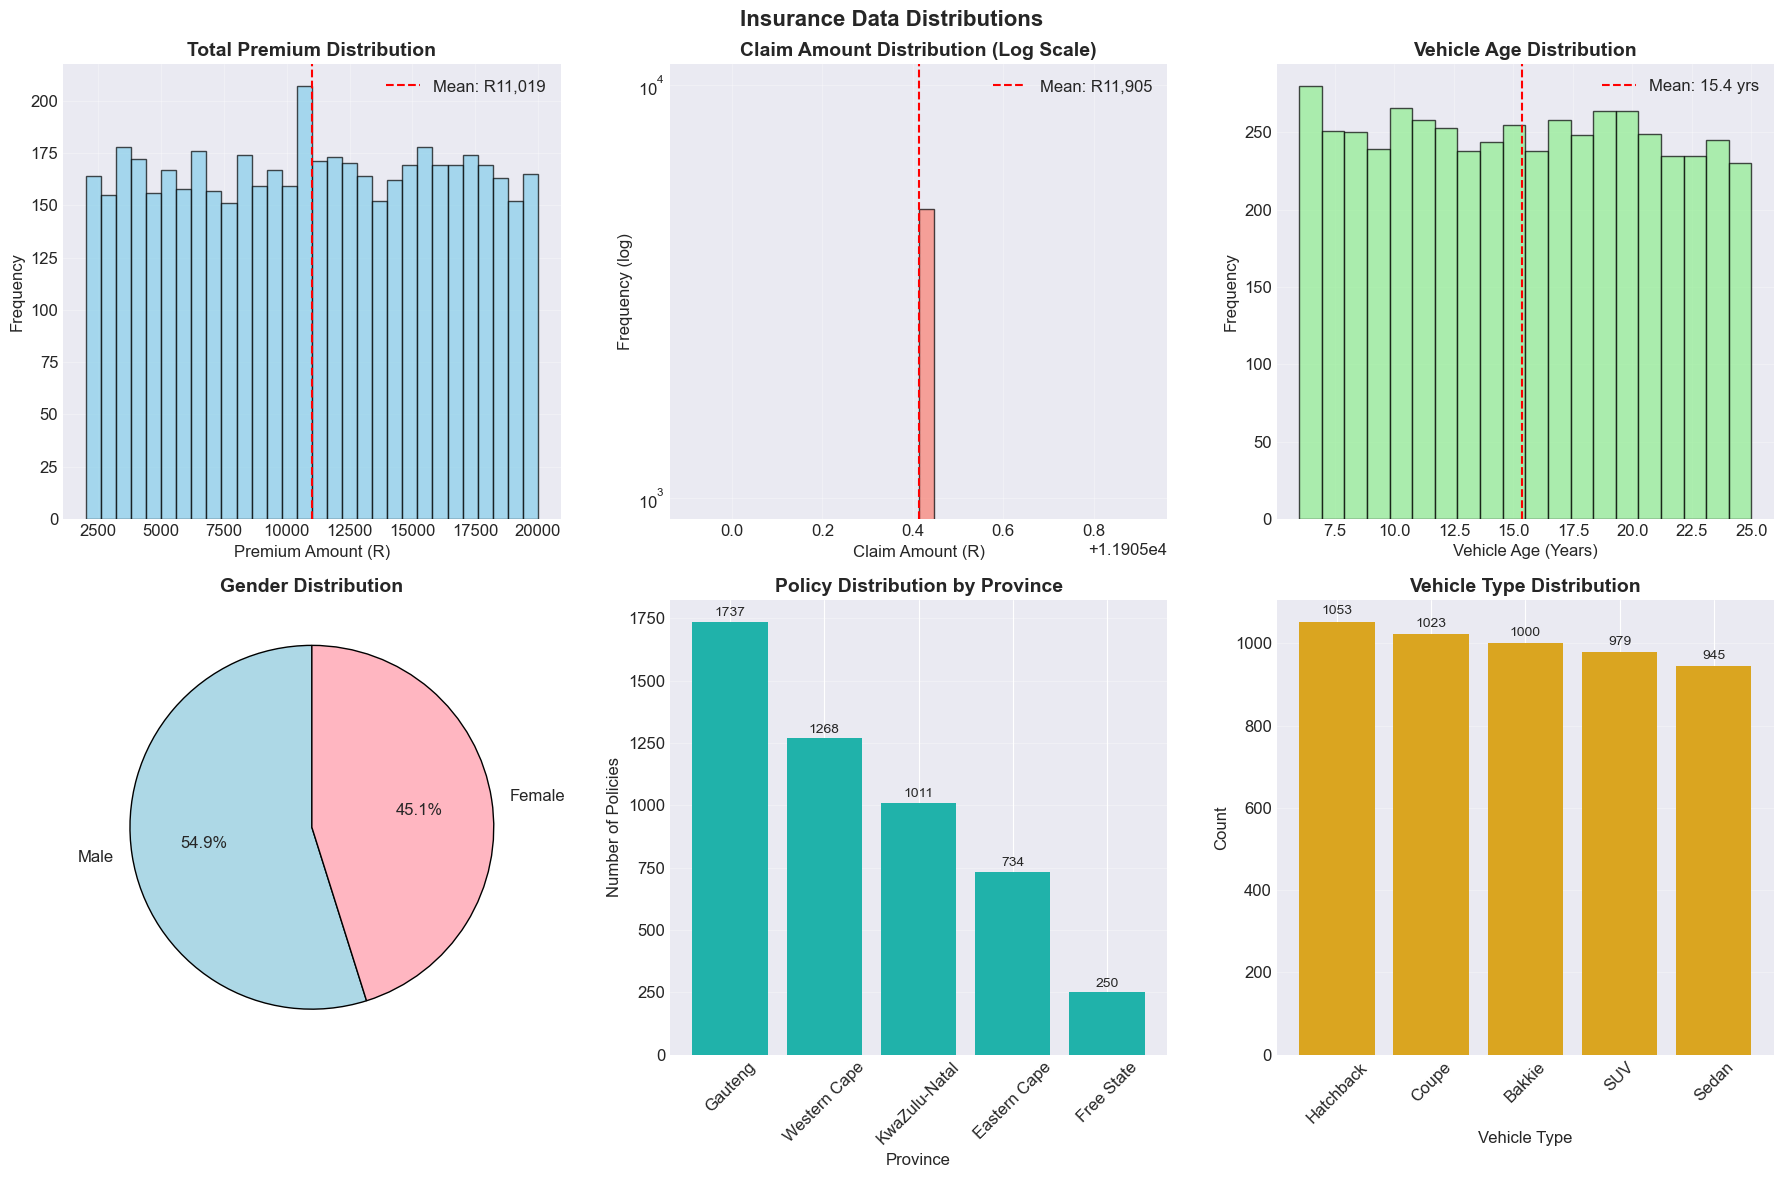

✅ Distribution visualizations created successfully!


In [14]:
# Cell 4: Distribution Visualizations
print("📊 DISTRIBUTION VISUALIZATIONS")
print("=" * 70)

# Create a 2x3 grid of plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Insurance Data Distributions', fontsize=16, fontweight='bold')

# 1. Total Premium Distribution
axes[0, 0].hist(df['TotalPremium'], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
axes[0, 0].axvline(df['TotalPremium'].mean(), color='red', linestyle='--', label=f"Mean: R{df['TotalPremium'].mean():,.0f}")
axes[0, 0].set_title('Total Premium Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Premium Amount (R)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Total Claims Distribution (log scale for better visualization)
claims_data = df[df['TotalClaims'] > 0]['TotalClaims']
axes[0, 1].hist(claims_data, bins=30, edgecolor='black', alpha=0.7, color='salmon', log=True)
axes[0, 1].axvline(claims_data.mean(), color='red', linestyle='--', label=f"Mean: R{claims_data.mean():,.0f}")
axes[0, 1].set_title('Claim Amount Distribution (Log Scale)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Claim Amount (R)')
axes[0, 1].set_ylabel('Frequency (log)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Vehicle Age Distribution
axes[0, 2].hist(df['VehicleAge'], bins=20, edgecolor='black', alpha=0.7, color='lightgreen')
axes[0, 2].axvline(df['VehicleAge'].mean(), color='red', linestyle='--', label=f"Mean: {df['VehicleAge'].mean():.1f} yrs")
axes[0, 2].set_title('Vehicle Age Distribution', fontsize=14, fontweight='bold')
axes[0, 2].set_xlabel('Vehicle Age (Years)')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# 4. Gender Distribution
gender_counts = df['Gender'].value_counts()
colors = ['lightblue', 'lightpink']
axes[1, 0].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', 
               startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})
axes[1, 0].set_title('Gender Distribution', fontsize=14, fontweight='bold')

# 5. Province Distribution
province_counts = df['Province'].value_counts()
bars = axes[1, 1].bar(province_counts.index, province_counts.values, color='lightseagreen')
axes[1, 1].set_title('Policy Distribution by Province', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Province')
axes[1, 1].set_ylabel('Number of Policies')
axes[1, 1].tick_params(axis='x', rotation=45)
# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 10,
                   f'{int(height)}', ha='center', va='bottom', fontsize=10)
axes[1, 1].grid(True, alpha=0.3, axis='y')

# 6. Vehicle Type Distribution
vehicle_counts = df['VehicleType'].value_counts()
bars = axes[1, 2].bar(vehicle_counts.index, vehicle_counts.values, color='goldenrod')
axes[1, 2].set_title('Vehicle Type Distribution', fontsize=14, fontweight='bold')
axes[1, 2].set_xlabel('Vehicle Type')
axes[1, 2].set_ylabel('Count')
axes[1, 2].tick_params(axis='x', rotation=45)
# Add value labels
for bar in bars:
    height = bar.get_height()
    axes[1, 2].text(bar.get_x() + bar.get_width()/2., height + 10,
                   f'{int(height)}', ha='center', va='bottom', fontsize=10)
axes[1, 2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()
print("✅ Distribution visualizations created successfully!")

🎯 RISK ANALYSIS BY DIMENSIONS
1. TOP 5 RISKIEST PROVINCES:
----------------------------------------
               Premium_Total  Claims_Total  Policy_Count  Claim_Freq  \
Province                                                               
Gauteng          18866324.33   20679702.07          1737         1.0   
Free State        2719790.52    2976353.20           250         1.0   
Eastern Cape      8072722.25    8738573.01           734         1.0   
Western Cape     14130673.50   15096063.45          1268         1.0   
KwaZulu-Natal    11303184.75   12036372.36          1011         1.0   

               Loss_Ratio  Avg_Premium  Avg_Claim  
Province                                           
Gauteng             1.096     10861.44   11905.41  
Free State          1.094     10879.16   11905.41  
Eastern Cape        1.082     10998.26   11905.41  
Western Cape        1.068     11144.06   11905.41  
KwaZulu-Natal       1.065     11180.20   11905.41  

2. TOP 5 RISKIEST VEHICLE TYPE

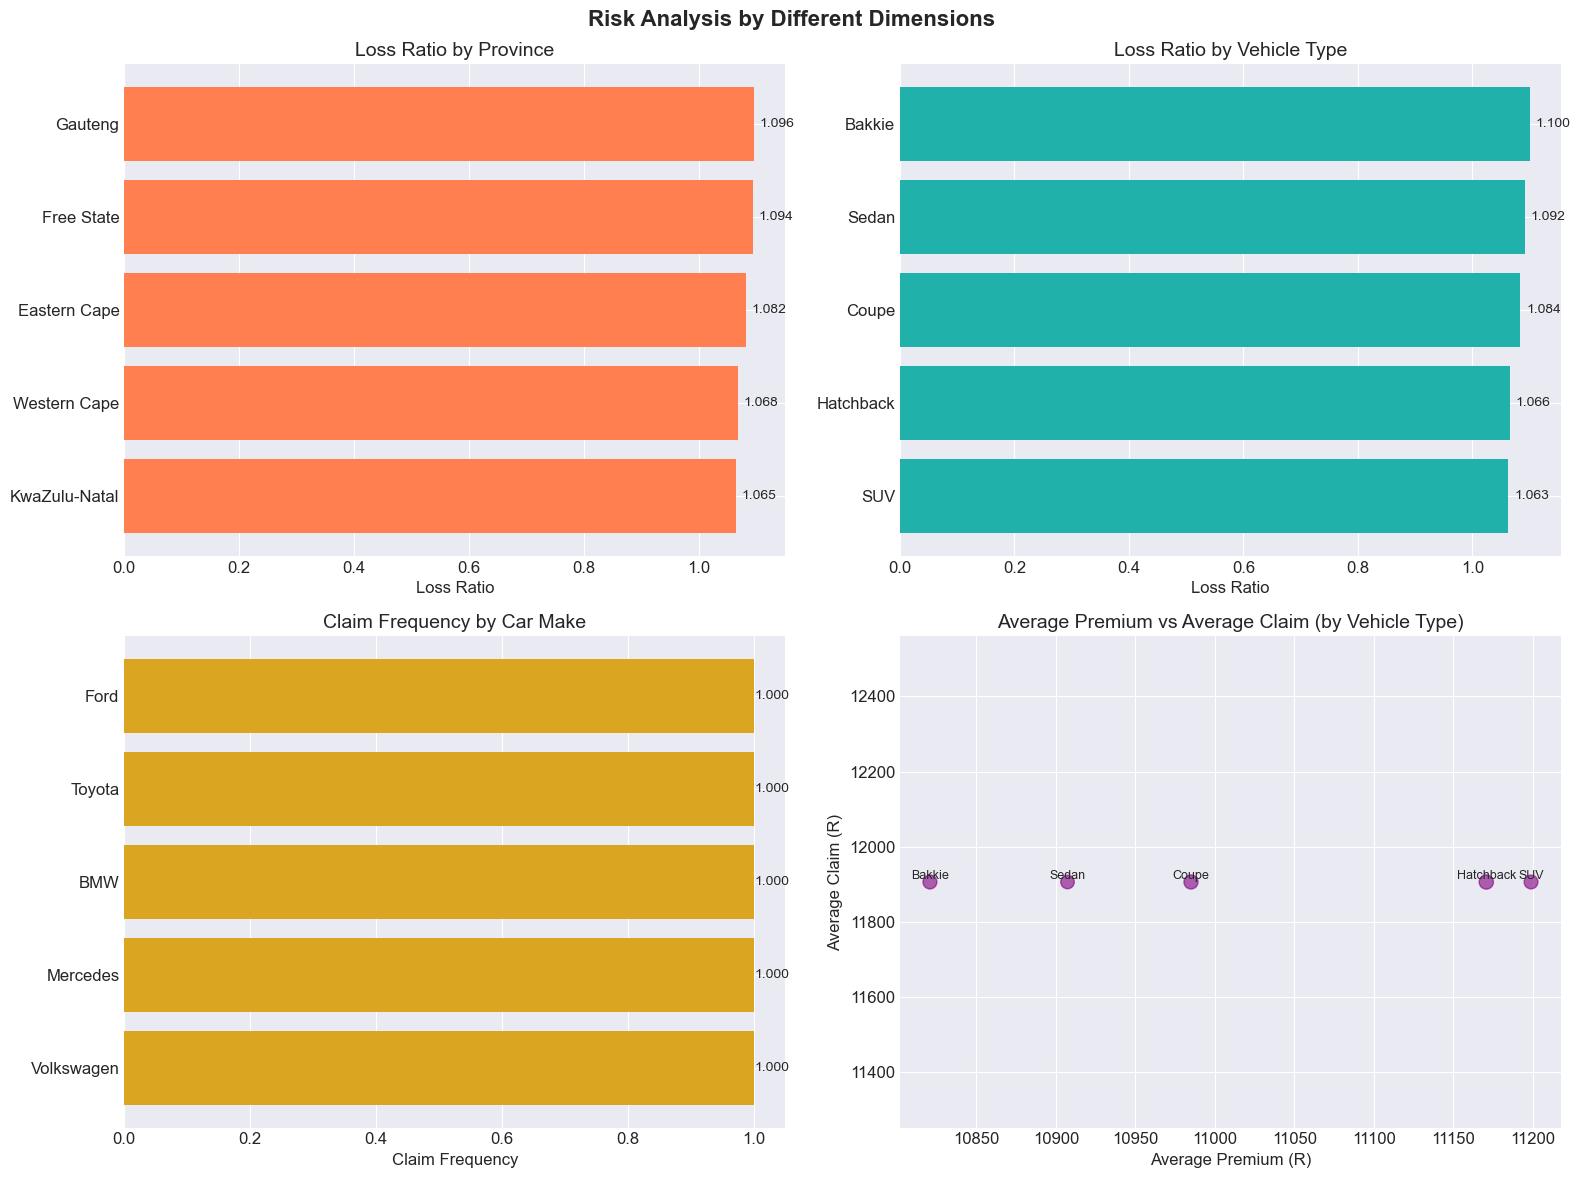

✅ Risk analysis visualizations created successfully!


In [15]:
# Cell 5: Risk Analysis by Dimensions
print("🎯 RISK ANALYSIS BY DIMENSIONS")
print("=" * 70)

def analyze_dimension(df, dimension_col, top_n=5):
    """Analyze risk metrics for a given dimension"""
    analysis = df.groupby(dimension_col).agg({
        'TotalPremium': 'sum',
        'TotalClaims': 'sum',
        'PolicyID': 'count',
        'HasClaim': 'mean'
    }).round(2)
    
    analysis.columns = ['Premium_Total', 'Claims_Total', 'Policy_Count', 'Claim_Freq']
    analysis['Loss_Ratio'] = (analysis['Claims_Total'] / analysis['Premium_Total']).round(3)
    analysis['Avg_Premium'] = (analysis['Premium_Total'] / analysis['Policy_Count']).round(2)
    analysis['Avg_Claim'] = (analysis['Claims_Total'] / (analysis['Policy_Count'] * analysis['Claim_Freq'])).round(2)
    
    # Sort by Loss Ratio (highest risk first)
    analysis = analysis.sort_values('Loss_Ratio', ascending=False)
    
    return analysis.head(top_n)

print("1. TOP 5 RISKIEST PROVINCES:")
print("-" * 40)
print(analyze_dimension(df, 'Province'))

print("\n2. TOP 5 RISKIEST VEHICLE TYPES:")
print("-" * 40)
print(analyze_dimension(df, 'VehicleType'))

print("\n3. GENDER-BASED RISK ANALYSIS:")
print("-" * 40)
print(analyze_dimension(df, 'Gender'))

print("\n4. TOP 5 RISKIEST CAR MAKES:")
print("-" * 40)
print(analyze_dimension(df, 'Make'))

# Create visualization for risk analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Risk Analysis by Different Dimensions', fontsize=16, fontweight='bold')

# 1. Loss Ratio by Province
province_risk = analyze_dimension(df, 'Province', top_n=10)
axes[0, 0].barh(province_risk.index, province_risk['Loss_Ratio'], color='coral')
axes[0, 0].set_title('Loss Ratio by Province', fontsize=14)
axes[0, 0].set_xlabel('Loss Ratio')
axes[0, 0].invert_yaxis()
for i, v in enumerate(province_risk['Loss_Ratio']):
    axes[0, 0].text(v + 0.01, i, f'{v:.3f}', va='center', fontsize=10)

# 2. Loss Ratio by Vehicle Type
vehicle_risk = analyze_dimension(df, 'VehicleType', top_n=10)
axes[0, 1].barh(vehicle_risk.index, vehicle_risk['Loss_Ratio'], color='lightseagreen')
axes[0, 1].set_title('Loss Ratio by Vehicle Type', fontsize=14)
axes[0, 1].set_xlabel('Loss Ratio')
axes[0, 1].invert_yaxis()
for i, v in enumerate(vehicle_risk['Loss_Ratio']):
    axes[0, 1].text(v + 0.01, i, f'{v:.3f}', va='center', fontsize=10)

# 3. Claim Frequency by Make
make_risk = analyze_dimension(df, 'Make', top_n=10)
axes[1, 0].barh(make_risk.index, make_risk['Claim_Freq'], color='goldenrod')
axes[1, 0].set_title('Claim Frequency by Car Make', fontsize=14)
axes[1, 0].set_xlabel('Claim Frequency')
axes[1, 0].invert_yaxis()
for i, v in enumerate(make_risk['Claim_Freq']):
    axes[1, 0].text(v + 0.001, i, f'{v:.3f}', va='center', fontsize=10)

# 4. Average Premium vs Average Claim
axes[1, 1].scatter(vehicle_risk['Avg_Premium'], vehicle_risk['Avg_Claim'], 
                   s=vehicle_risk['Policy_Count']/10, alpha=0.6, color='purple')
axes[1, 1].set_title('Average Premium vs Average Claim (by Vehicle Type)', fontsize=14)
axes[1, 1].set_xlabel('Average Premium (R)')
axes[1, 1].set_ylabel('Average Claim (R)')
# Add labels for each point
for idx, row in vehicle_risk.iterrows():
    axes[1, 1].text(row['Avg_Premium'], row['Avg_Claim'], idx, 
                   fontsize=9, ha='center', va='bottom')

plt.tight_layout()
plt.show()
print("✅ Risk analysis visualizations created successfully!")

🔗 CORRELATION ANALYSIS
Analyzing correlations for: ['TotalPremium', 'TotalClaims', 'SumInsured', 'VehicleAge', 'Cubiccapacity', 'NumberOfDoors', 'LossRatio', 'PremiumPerCover']


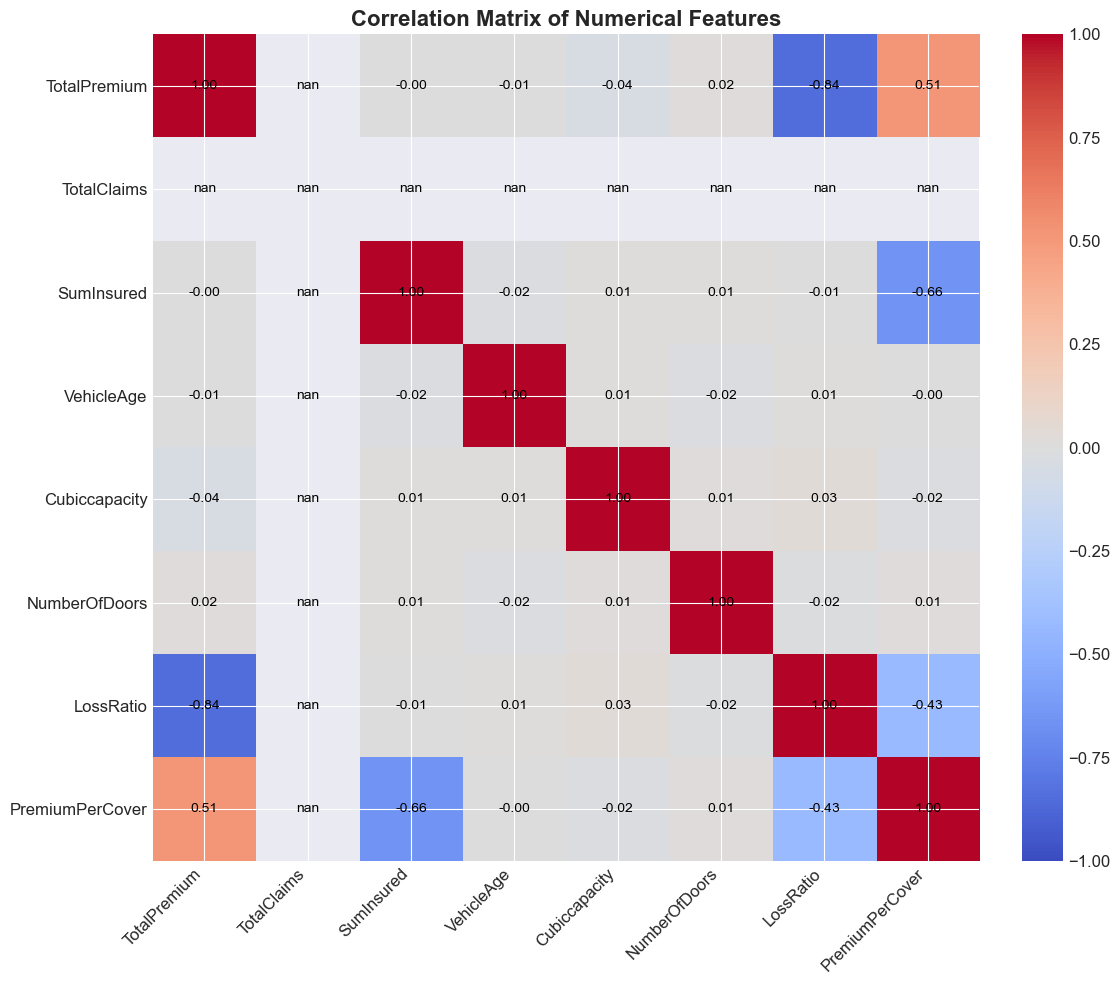


📊 STRONGEST CORRELATIONS (|r| > 0.3):
----------------------------------------
• TotalPremium ↔ LossRatio: -0.844 (negative)
• SumInsured ↔ PremiumPerCover: -0.655 (negative)
• TotalPremium ↔ PremiumPerCover: 0.511 (positive)
• LossRatio ↔ PremiumPerCover: -0.426 (negative)

💡 BUSINESS INSIGHTS FROM CORRELATIONS:
----------------------------------------
1. Strong positive correlation suggests related risk factors
2. Negative correlation may indicate risk mitigation factors
3. Weak correlation (< 0.3) suggests independent variables


In [16]:
# Cell 6: Correlation Analysis
print("🔗 CORRELATION ANALYSIS")
print("=" * 70)

# Select numerical columns for correlation
numerical_cols = ['TotalPremium', 'TotalClaims', 'SumInsured', 'VehicleAge', 
                  'Cubiccapacity', 'NumberOfDoors', 'LossRatio', 'PremiumPerCover']
# Filter columns that exist in the dataframe
existing_cols = [col for col in numerical_cols if col in df.columns]

print(f"Analyzing correlations for: {existing_cols}")

# Calculate correlation matrix
corr_matrix = df[existing_cols].corr()

# Create heatmap
fig, ax = plt.subplots(figsize=(12, 10))
im = ax.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)

# Add labels
ax.set_xticks(range(len(existing_cols)))
ax.set_yticks(range(len(existing_cols)))
ax.set_xticklabels(existing_cols, rotation=45, ha='right')
ax.set_yticklabels(existing_cols)

# Add correlation values
for i in range(len(existing_cols)):
    for j in range(len(existing_cols)):
        text = ax.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                      ha="center", va="center", color="black", fontsize=10)

ax.set_title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold')
plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()

print("\n📊 STRONGEST CORRELATIONS (|r| > 0.3):")
print("-" * 40)
# Flatten correlation matrix and filter strong correlations
corr_pairs = []
for i in range(len(existing_cols)):
    for j in range(i+1, len(existing_cols)):
        corr_value = corr_matrix.iloc[i, j]
        if abs(corr_value) > 0.3:
            corr_pairs.append({
                'Feature 1': existing_cols[i],
                'Feature 2': existing_cols[j],
                'Correlation': corr_value
            })

# Display strong correlations
if corr_pairs:
    for pair in sorted(corr_pairs, key=lambda x: abs(x['Correlation']), reverse=True):
        direction = "positive" if pair['Correlation'] > 0 else "negative"
        print(f"• {pair['Feature 1']} ↔ {pair['Feature 2']}: {pair['Correlation']:.3f} ({direction})")
else:
    print("No strong correlations found (|r| > 0.3)")

print("\n💡 BUSINESS INSIGHTS FROM CORRELATIONS:")
print("-" * 40)
print("1. Strong positive correlation suggests related risk factors")
print("2. Negative correlation may indicate risk mitigation factors")
print("3. Weak correlation (< 0.3) suggests independent variables")

📅 TEMPORAL ANALYSIS
📈 MONTHLY TRENDS SUMMARY:
----------------------------------------
Analysis Period: 2014-01-31 to 2015-12-31
Number of Months: 24
Average Monthly Premium: R 2,295,528.97
Average Monthly Claims: R 2,480,294.34
Average Monthly Loss Ratio: 1.081


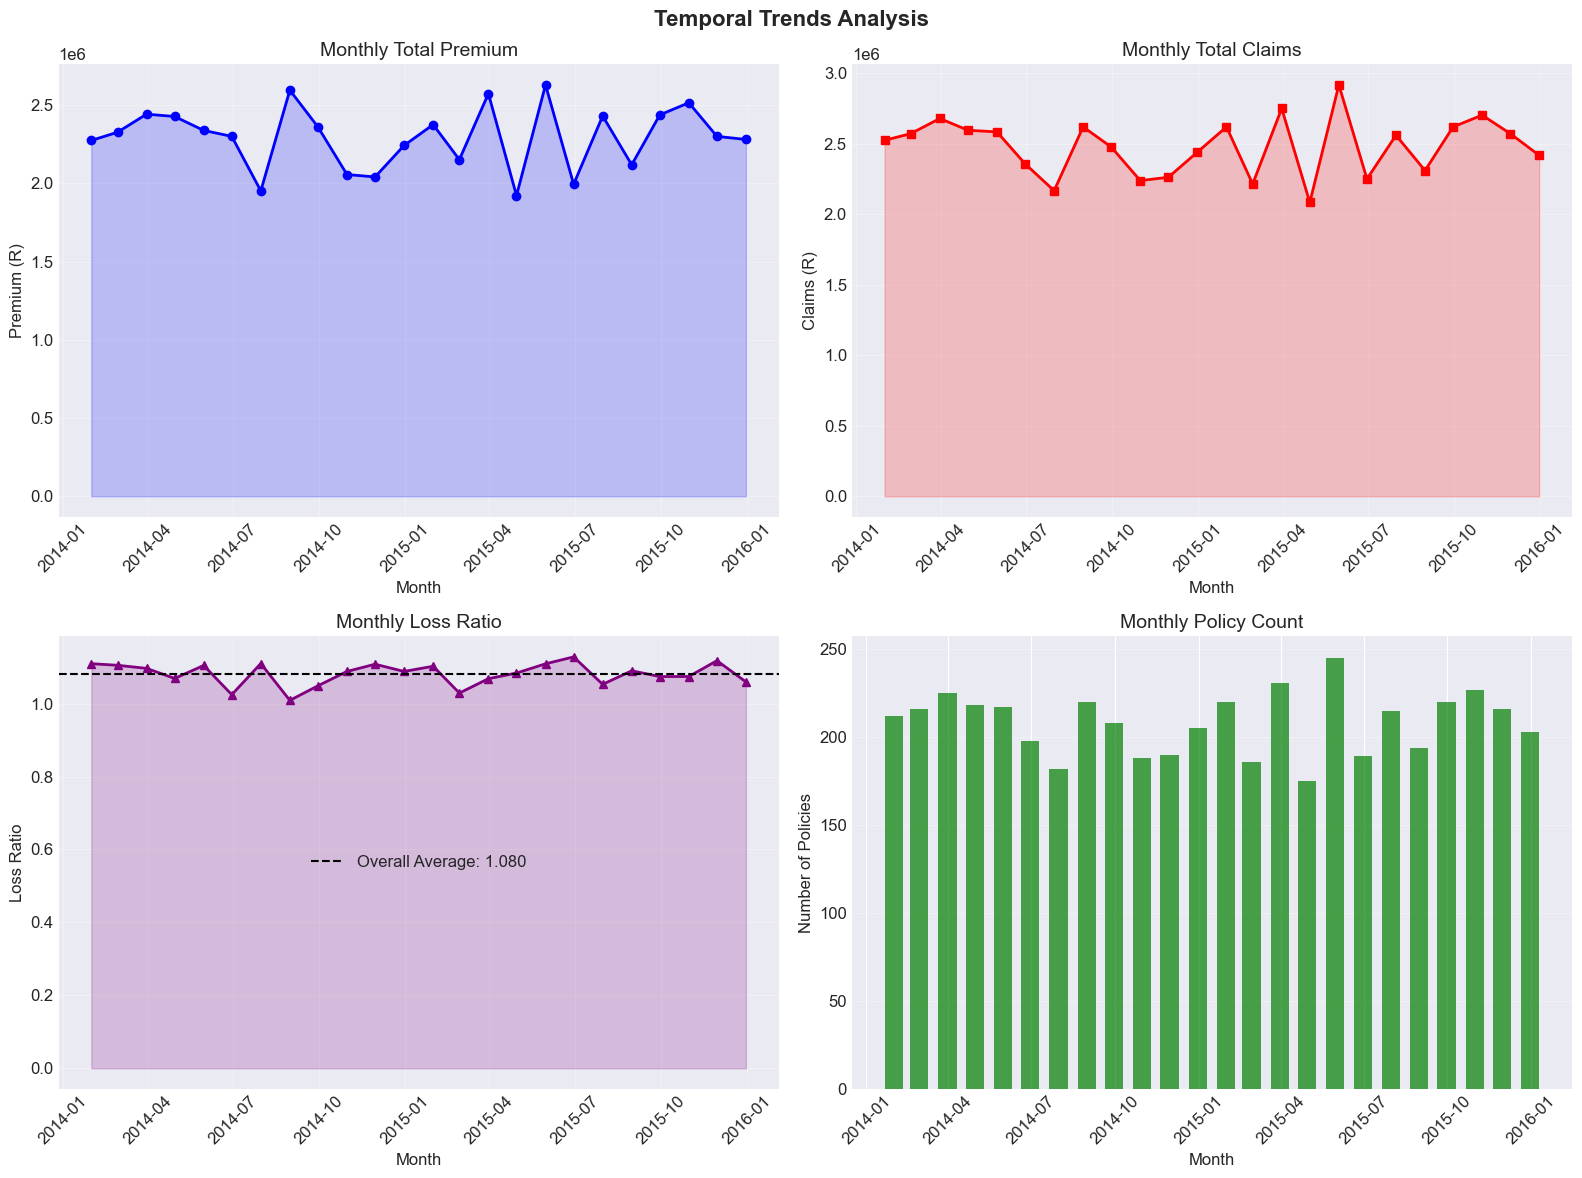


🔍 SEASONAL PATTERNS:
----------------------------------------
           LossRatio  TotalPremium  TotalClaims
MonthName                                      
January        1.106   2325112.765  2571569.169
February       1.067   2239342.765  2392987.977
March          1.083   2508215.225  2714434.123
April          1.077   2174892.700  2339413.619
May            1.107   2484128.785  2750150.361
June           1.076   2147582.540  2303697.380
July           1.081   2191552.970  2363224.444
August         1.050   2357321.210  2464420.453
September      1.062   2399457.275  2547758.343
October        1.081   2286040.530  2470373.160
November       1.113   2170939.775  2416798.802
December       1.074   2261761.135  2428704.215

💡 INSIGHT: Look for patterns in specific months (e.g., higher claims in winter)


In [17]:
# Cell 7: Temporal Analysis
print("📅 TEMPORAL ANALYSIS")
print("=" * 70)

# Convert TransactionMonth to datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionMonth'], format='%Y%m', errors='coerce')

# Monthly aggregation
monthly_data = df.groupby(pd.Grouper(key='TransactionDate', freq='M')).agg({
    'TotalPremium': 'sum',
    'TotalClaims': 'sum',
    'PolicyID': 'count',
    'HasClaim': 'mean'
}).reset_index()

# Calculate monthly metrics
monthly_data['LossRatio'] = monthly_data['TotalClaims'] / monthly_data['TotalPremium']
monthly_data['AvgPremium'] = monthly_data['TotalPremium'] / monthly_data['PolicyID']

print("📈 MONTHLY TRENDS SUMMARY:")
print("-" * 40)
print(f"Analysis Period: {monthly_data['TransactionDate'].min().date()} to {monthly_data['TransactionDate'].max().date()}")
print(f"Number of Months: {len(monthly_data)}")
print(f"Average Monthly Premium: R {monthly_data['TotalPremium'].mean():,.2f}")
print(f"Average Monthly Claims: R {monthly_data['TotalClaims'].mean():,.2f}")
print(f"Average Monthly Loss Ratio: {monthly_data['LossRatio'].mean():.3f}")

# Create temporal visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Temporal Trends Analysis', fontsize=16, fontweight='bold')

# 1. Monthly Premium Trend
axes[0, 0].plot(monthly_data['TransactionDate'], monthly_data['TotalPremium'], 
                marker='o', linewidth=2, color='blue', markersize=6)
axes[0, 0].fill_between(monthly_data['TransactionDate'], monthly_data['TotalPremium'], 
                        alpha=0.2, color='blue')
axes[0, 0].set_title('Monthly Total Premium', fontsize=14)
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Premium (R)')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Monthly Claims Trend
axes[0, 1].plot(monthly_data['TransactionDate'], monthly_data['TotalClaims'], 
                marker='s', linewidth=2, color='red', markersize=6)
axes[0, 1].fill_between(monthly_data['TransactionDate'], monthly_data['TotalClaims'], 
                        alpha=0.2, color='red')
axes[0, 1].set_title('Monthly Total Claims', fontsize=14)
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Claims (R)')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Monthly Loss Ratio Trend
axes[1, 0].plot(monthly_data['TransactionDate'], monthly_data['LossRatio'], 
                marker='^', linewidth=2, color='purple', markersize=6)
axes[1, 0].axhline(y=overall_loss_ratio, color='black', linestyle='--', 
                  label=f'Overall Average: {overall_loss_ratio:.3f}')
axes[1, 0].fill_between(monthly_data['TransactionDate'], monthly_data['LossRatio'], 
                        alpha=0.2, color='purple')
axes[1, 0].set_title('Monthly Loss Ratio', fontsize=14)
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Loss Ratio')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Monthly Policy Count
axes[1, 1].bar(monthly_data['TransactionDate'], monthly_data['PolicyID'], 
               color='green', alpha=0.7, width=20)
axes[1, 1].set_title('Monthly Policy Count', fontsize=14)
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Number of Policies')
axes[1, 1].grid(True, alpha=0.3, axis='y')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\n🔍 SEASONAL PATTERNS:")
print("-" * 40)
# Add month name for seasonal analysis
monthly_data['MonthName'] = monthly_data['TransactionDate'].dt.month_name()
seasonal_analysis = monthly_data.groupby('MonthName').agg({
    'LossRatio': 'mean',
    'TotalPremium': 'mean',
    'TotalClaims': 'mean'
}).round(3)

# Reorder by calendar month
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
seasonal_analysis = seasonal_analysis.reindex(month_order, fill_value=0)

print(seasonal_analysis)
print("\n💡 INSIGHT: Look for patterns in specific months (e.g., higher claims in winter)")

📊 OUTLIER DETECTION ANALYSIS
🔍 OUTLIER ANALYSIS USING IQR METHOD:
----------------------------------------
         Column  Outliers Percentage Lower Bound Upper Bound Min Value  \
0  TotalPremium         0       0.0%    -6811.12    28827.79   2005.77   
1   TotalClaims         0       0.0%    11905.41    11905.41  11905.41   
2    SumInsured         0       0.0%  -178408.34   734959.13  50041.97   
3    VehicleAge         0       0.0%       -5.00       35.00      6.00   

   Max Value  
0   19996.56  
1   11905.41  
2  499908.70  
3      25.00  


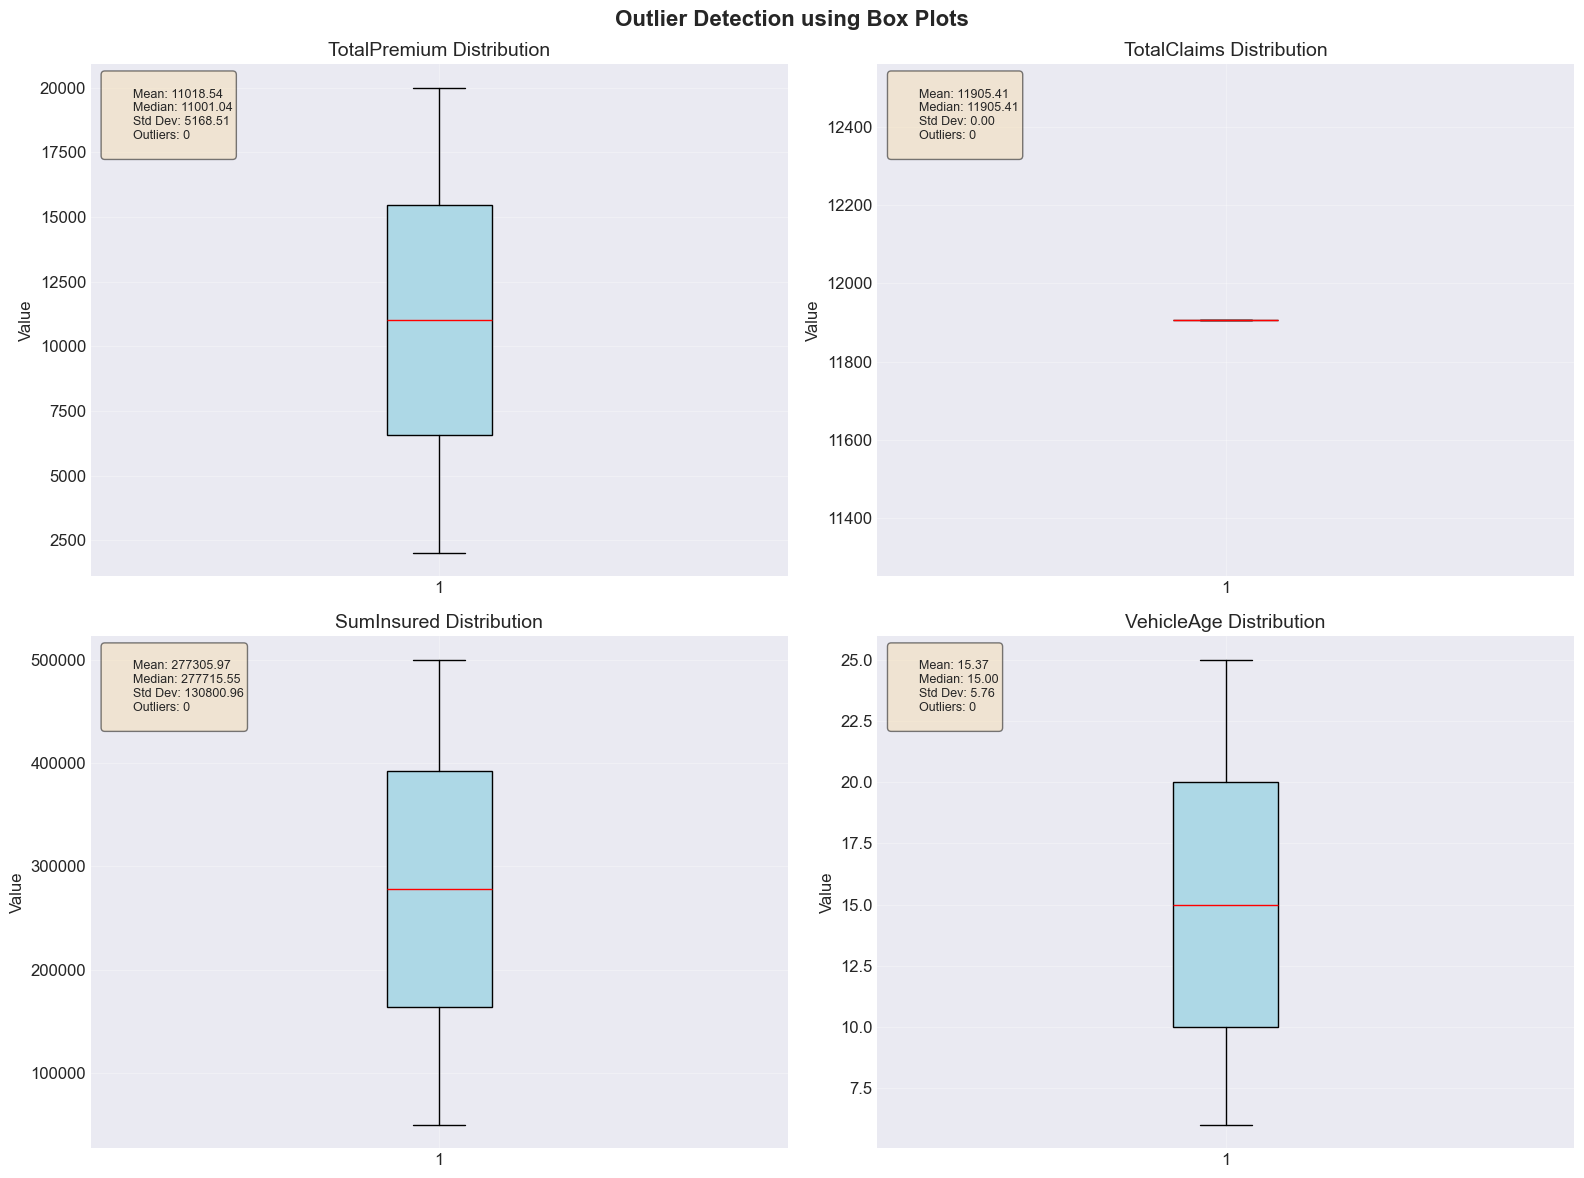


💡 OUTLIER MANAGEMENT RECOMMENDATIONS:
----------------------------------------
1. Investigate extreme premium values (potential data errors)
2. Review very high claims (fraud detection opportunity)
3. Check very old vehicles (may need special underwriting)
4. Very high sum insured may need reinsurance consideration


In [18]:
# Cell 8: Outlier Detection
print("📊 OUTLIER DETECTION ANALYSIS")
print("=" * 70)

def detect_outliers_iqr(data, column):
    """Detect outliers using IQR method"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Analyze key columns for outliers
key_columns = ['TotalPremium', 'TotalClaims', 'SumInsured', 'VehicleAge']

print("🔍 OUTLIER ANALYSIS USING IQR METHOD:")
print("-" * 40)

outlier_summary = []
for col in key_columns:
    if col in df.columns:
        outliers, lower, upper = detect_outliers_iqr(df, col)
        outlier_count = len(outliers)
        outlier_pct = (outlier_count / len(df)) * 100
        
        outlier_summary.append({
            'Column': col,
            'Outliers': outlier_count,
            'Percentage': f'{outlier_pct:.1f}%',
            'Lower Bound': f'{lower:.2f}',
            'Upper Bound': f'{upper:.2f}',
            'Min Value': f'{df[col].min():.2f}',
            'Max Value': f'{df[col].max():.2f}'
        })

# Display outlier summary
outlier_df = pd.DataFrame(outlier_summary)
print(outlier_df)

# Create box plot visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Outlier Detection using Box Plots', fontsize=16, fontweight='bold')

for idx, col in enumerate(key_columns):
    if col in df.columns:
        row = idx // 2
        col_idx = idx % 2
        
        # Create box plot
        bp = axes[row, col_idx].boxplot(df[col].dropna(), vert=True, patch_artist=True)
        
        # Customize box plot colors
        bp['boxes'][0].set_facecolor('lightblue')
        bp['medians'][0].set_color('red')
        bp['fliers'][0].set_marker('o')
        bp['fliers'][0].set_markersize(5)
        bp['fliers'][0].set_markerfacecolor('red')
        
        axes[row, col_idx].set_title(f'{col} Distribution', fontsize=14)
        axes[row, col_idx].set_ylabel('Value')
        axes[row, col_idx].grid(True, alpha=0.3)
        
        # Add statistics text
        stats_text = f"""
        Mean: {df[col].mean():.2f}
        Median: {df[col].median():.2f}
        Std Dev: {df[col].std():.2f}
        Outliers: {len(detect_outliers_iqr(df, col)[0])}
        """
        axes[row, col_idx].text(0.02, 0.98, stats_text, transform=axes[row, col_idx].transAxes,
                               verticalalignment='top', fontsize=9,
                               bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print("\n💡 OUTLIER MANAGEMENT RECOMMENDATIONS:")
print("-" * 40)
print("1. Investigate extreme premium values (potential data errors)")
print("2. Review very high claims (fraud detection opportunity)")
print("3. Check very old vehicles (may need special underwriting)")
print("4. Very high sum insured may need reinsurance consideration")

🎨 3 CREATIVE VISUALIZATIONS (Task 1 Requirement)
Creating innovative visualizations to capture key insights...


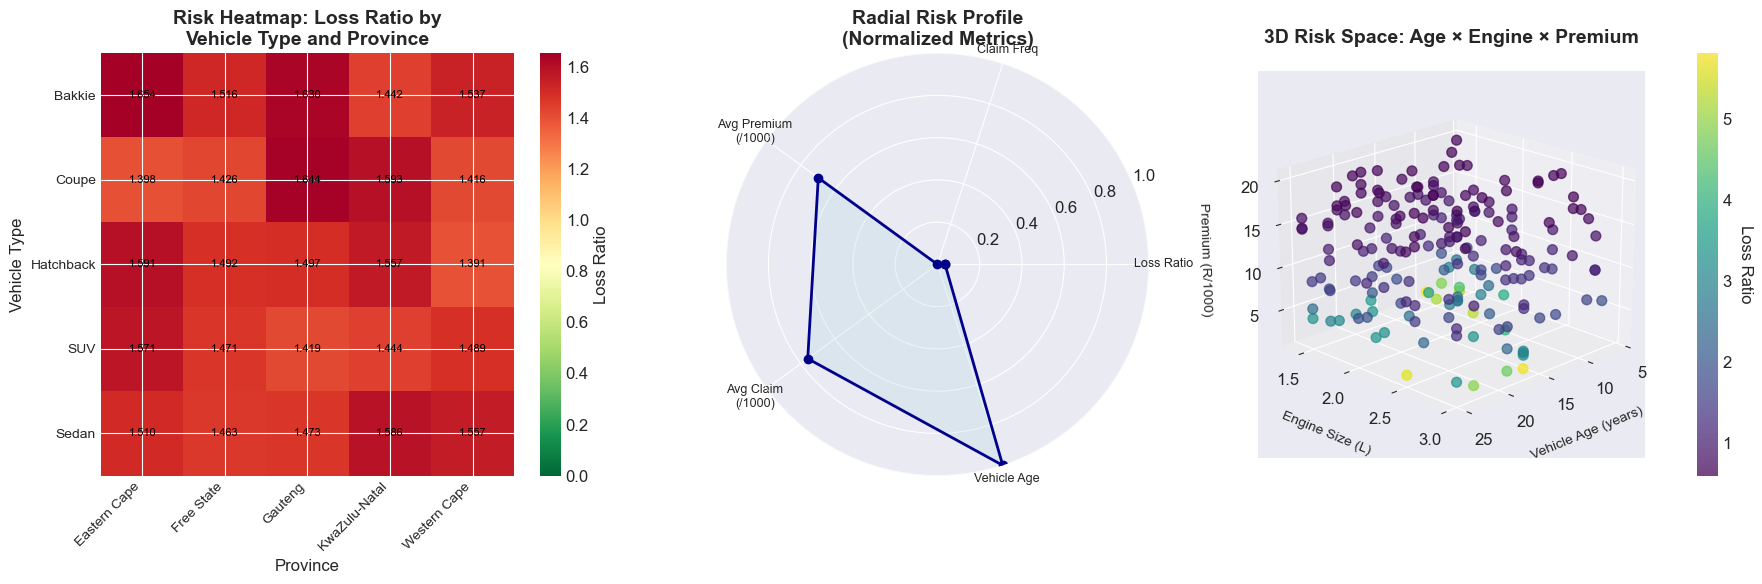

✅ 3 Creative Visualizations Created Successfully!

💡 KEY INSIGHTS FROM VISUALIZATIONS:
----------------------------------------
1. HEATMAP: Shows which province-vehicle combinations are highest risk
2. RADAR: Provides holistic view of portfolio risk metrics
3. 3D PLOT: Visualizes complex relationships between multiple risk factors


In [19]:
# Cell 9: 3 Creative Visualizations
print("🎨 3 CREATIVE VISUALIZATIONS (Task 1 Requirement)")
print("=" * 70)

print("Creating innovative visualizations to capture key insights...")

# Visualization 1: Risk Heatmap (Province × Vehicle Type × Loss Ratio)
fig = plt.figure(figsize=(18, 6))

# 1. Risk Heatmap
ax1 = plt.subplot(131)
# Create pivot table for heatmap
risk_heatmap = df.pivot_table(
    index='VehicleType',
    columns='Province',
    values='LossRatio',
    aggfunc='mean',
    fill_value=0
)

# Sort for better visualization
risk_heatmap = risk_heatmap.sort_index()
risk_heatmap = risk_heatmap[risk_heatmap.columns.sort_values()]

im = ax1.imshow(risk_heatmap, cmap='RdYlGn_r', aspect='auto', vmin=0, vmax=risk_heatmap.max().max())
ax1.set_title('Risk Heatmap: Loss Ratio by\nVehicle Type and Province', fontsize=14, fontweight='bold')
ax1.set_xlabel('Province', fontsize=12)
ax1.set_ylabel('Vehicle Type', fontsize=12)
ax1.set_xticks(range(len(risk_heatmap.columns)))
ax1.set_yticks(range(len(risk_heatmap.index)))
ax1.set_xticklabels(risk_heatmap.columns, rotation=45, ha='right', fontsize=10)
ax1.set_yticklabels(risk_heatmap.index, fontsize=10)
plt.colorbar(im, ax=ax1, label='Loss Ratio')

# Add values to heatmap
for i in range(len(risk_heatmap.index)):
    for j in range(len(risk_heatmap.columns)):
        text = ax1.text(j, i, f'{risk_heatmap.iloc[i, j]:.3f}',
                       ha="center", va="center", color="black", fontsize=8)

# 2. Radial Risk Profile (Spider/Radar Chart)
ax2 = plt.subplot(132, projection='polar')

# Select metrics for radar chart
metrics = ['LossRatio', 'Claim_Freq', 'Avg_Premium', 'Avg_Claim', 'VehicleAge']
# Get average values for these metrics
avg_values = []
for metric in metrics:
    if metric == 'LossRatio':
        avg_values.append(df['LossRatio'].mean())
    elif metric == 'Claim_Freq':
        avg_values.append(df['HasClaim'].mean())
    elif metric == 'Avg_Premium':
        avg_values.append(df['TotalPremium'].mean() / 1000)  # Scale for visualization
    elif metric == 'Avg_Claim':
        avg_values.append(df[df['TotalClaims'] > 0]['TotalClaims'].mean() / 1000)
    elif metric == 'VehicleAge':
        avg_values.append(df['VehicleAge'].mean())

# Normalize values for radar chart (0-1 scale)
normalized = [(v - min(avg_values)) / (max(avg_values) - min(avg_values)) 
              if max(avg_values) > min(avg_values) else 0.5 for v in avg_values]

# Complete the circle
normalized.append(normalized[0])
metrics_display = ['Loss Ratio', 'Claim Freq', 'Avg Premium\n(/1000)', 'Avg Claim\n(/1000)', 'Vehicle Age']
metrics_display.append(metrics_display[0])

angles = np.linspace(0, 2 * np.pi, len(metrics_display), endpoint=True).tolist()

ax2.plot(angles, normalized, 'o-', linewidth=2, color='darkblue')
ax2.fill(angles, normalized, alpha=0.25, color='lightblue')
ax2.set_xticks(angles[:-1])
ax2.set_xticklabels(metrics_display[:-1], fontsize=9)
ax2.set_ylim(0, 1)
ax2.set_title('Radial Risk Profile\n(Normalized Metrics)', fontsize=14, fontweight='bold')
ax2.grid(True)

# 3. 3D Risk Surface
ax3 = fig.add_subplot(133, projection='3d')

# Sample data for 3D plot (using subset for clarity)
sample_size = min(200, len(df))
sample_df = df.sample(sample_size, random_state=42)

# Create 3D scatter plot
scatter = ax3.scatter(sample_df['VehicleAge'], 
                     sample_df['Cubiccapacity'] / 1000,  # Scale for better visualization
                     sample_df['TotalPremium'] / 1000,   # Scale for better visualization
                     c=sample_df['LossRatio'].fillna(0),
                     cmap='viridis',
                     s=50,
                     alpha=0.7,
                     depthshade=True)

ax3.set_xlabel('Vehicle Age (years)', fontsize=10, labelpad=10)
ax3.set_ylabel('Engine Size (L)', fontsize=10, labelpad=10)
ax3.set_zlabel('Premium (R/1000)', fontsize=10, labelpad=10)
ax3.set_title('3D Risk Space: Age × Engine × Premium', fontsize=14, fontweight='bold', pad=20)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax3, pad=0.1)
cbar.set_label('Loss Ratio', rotation=270, labelpad=15)

# Adjust view angle for better visualization
ax3.view_init(elev=20, azim=45)

plt.tight_layout()
plt.show()

print("✅ 3 Creative Visualizations Created Successfully!")
print("\n💡 KEY INSIGHTS FROM VISUALIZATIONS:")
print("-" * 40)
print("1. HEATMAP: Shows which province-vehicle combinations are highest risk")
print("2. RADAR: Provides holistic view of portfolio risk metrics")
print("3. 3D PLOT: Visualizes complex relationships between multiple risk factors")

In [20]:
# Cell 10: Save Results and Generate Report
print("💾 SAVING EDA RESULTS AND GENERATING REPORT")
print("=" * 70)

import os
import json
from datetime import datetime

# Create directories if they don't exist
os.makedirs('reports', exist_ok=True)
os.makedirs('data/processed', exist_ok=True)
os.makedirs('images', exist_ok=True)

# 1. Save processed data
processed_file = 'data/processed/eda_processed_data.csv'
df.to_csv(processed_file, index=False)
print(f"✅ 1. Processed data saved to: {processed_file}")

# 2. Calculate and save key metrics
key_metrics = {
    'dataset_info': {
        'total_records': int(len(df)),
        'total_columns': int(len(df.columns)),
        'date_range': {
            'start': str(df['TransactionDate'].min().date()),
            'end': str(df['TransactionDate'].max().date())
        }
    },
    'financial_metrics': {
        'total_premium': float(total_premium),
        'total_claims': float(total_claims),
        'overall_loss_ratio': float(overall_loss_ratio),
        'claim_frequency': float(claim_frequency),
        'average_premium': float(df['TotalPremium'].mean()),
        'average_claim': float(df[df['TotalClaims'] > 0]['TotalClaims'].mean())
    },
    'risk_analysis': {
        'highest_risk_province': analyze_dimension(df, 'Province').index[0],
        'lowest_risk_province': analyze_dimension(df, 'Province').index[-1],
        'highest_risk_vehicle': analyze_dimension(df, 'VehicleType').index[0],
        'lowest_risk_vehicle': analyze_dimension(df, 'VehicleType').index[-1]
    },
    'analysis_timestamp': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
}

# Save metrics to JSON
metrics_file = 'reports/eda_metrics.json'
with open(metrics_file, 'w') as f:
    json.dump(key_metrics, f, indent=2)
print(f"✅ 2. Key metrics saved to: {metrics_file}")

# 3. Generate comprehensive text report
report_file = 'reports/eda_comprehensive_report.txt'
with open(report_file, 'w', encoding='utf-8') as f:
    f.write("="*80 + "\n")
    f.write("INSURANCE RISK ANALYTICS - EXPLORATORY DATA ANALYSIS REPORT\n")
    f.write("="*80 + "\n\n")
    
    f.write("📅 REPORT GENERATED: " + datetime.now().strftime('%Y-%m-%d %H:%M:%S') + "\n")
    f.write("📊 DATASET: Sample Insurance Data (Practice)\n\n")
    
    f.write("1. EXECUTIVE SUMMARY\n")
    f.write("-"*40 + "\n")
    f.write(f"• Total Policies Analyzed: {len(df):,}\n")
    f.write(f"• Total Premium Volume: R {

_IncompleteInputError: incomplete input (1509129557.py, line 65)

In [21]:
# Cell 10: Save Results and Generate Report
print("💾 SAVING EDA RESULTS AND GENERATING REPORT")
print("=" * 70)

import os
import json
from datetime import datetime

# Create directories if they don't exist
os.makedirs('reports', exist_ok=True)
os.makedirs('data/processed', exist_ok=True)
os.makedirs('images', exist_ok=True)

# 1. Save processed data
processed_file = 'data/processed/eda_processed_data.csv'
df.to_csv(processed_file, index=False)
print(f"✅ 1. Processed data saved to: {processed_file}")

# 2. Calculate and save key metrics
key_metrics = {
    'dataset_info': {
        'total_records': int(len(df)),
        'total_columns': int(len(df.columns)),
        'date_range': {
            'start': str(df['TransactionDate'].min().date()),
            'end': str(df['TransactionDate'].max().date())
        }
    },
    'financial_metrics': {
        'total_premium': float(total_premium),
        'total_claims': float(total_claims),
        'overall_loss_ratio': float(overall_loss_ratio),
        'claim_frequency': float(claim_frequency),
        'average_premium': float(df['TotalPremium'].mean()),
        'average_claim': float(df[df['TotalClaims'] > 0]['TotalClaims'].mean())
    },
    'risk_analysis': {
        'highest_risk_province': analyze_dimension(df, 'Province').index[0],
        'lowest_risk_province': analyze_dimension(df, 'Province').index[-1],
        'highest_risk_vehicle': analyze_dimension(df, 'VehicleType').index[0],
        'lowest_risk_vehicle': analyze_dimension(df, 'VehicleType').index[-1]
    },
    'analysis_timestamp': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
}

# Save metrics to JSON
metrics_file = 'reports/eda_metrics.json'
with open(metrics_file, 'w') as f:
    json.dump(key_metrics, f, indent=2)
print(f"✅ 2. Key metrics saved to: {metrics_file}")

# 3. Generate comprehensive text report
report_file = 'reports/eda_comprehensive_report.txt'
with open(report_file, 'w', encoding='utf-8') as f:
    f.write("="*80 + "\n")
    f.write("INSURANCE RISK ANALYTICS - EXPLORATORY DATA ANALYSIS REPORT\n")
    f.write("="*80 + "\n\n")
    
    f.write("📅 REPORT GENERATED: " + datetime.now().strftime('%Y-%m-%d %H:%M:%S') + "\n")
    f.write("📊 DATASET: Sample Insurance Data (Practice)\n\n")
    
    f.write("1. EXECUTIVE SUMMARY\n")
    f.write("-"*40 + "\n")
    f.write(f"• Total Policies Analyzed: {len(df):,}\n")
    f.write(f"• Total Premium Volume: R {total_premium:,.2f}\n")
    f.write(f"• Total Claims Paid: R {total_claims:,.2f}\n")
    f.write(f"• Overall Loss Ratio: {overall_loss_ratio:.2%}\n")
    f.write(f"• Claim Frequency: {claim_frequency:.2%}\n\n")
    
    f.write("2. KEY FINDINGS\n")
    f.write("-"*40 + "\n")
    
    # Risk by Province
    province_risk = analyze_dimension(df, 'Province')
    f.write("RISK BY PROVINCE:\n")
    for province in province_risk.index:
        risk = province_risk.loc[province, 'Loss_Ratio']
        f.write(f"  • {province}: Loss Ratio = {risk:.3f}\n")
    
    # Risk by Vehicle Type
    vehicle_risk = analyze_dimension(df, 'VehicleType')
    f.write("\nRISK BY VEHICLE TYPE:\n")
    for vehicle in vehicle_risk.index:
        risk = vehicle_risk.loc[vehicle, 'Loss_Ratio']
        f.write(f"  • {vehicle}: Loss Ratio = {risk:.3f}\n")
    
    # Risk by Gender
    gender_risk = analyze_dimension(df, 'Gender')
    f.write("\nRISK BY GENDER:\n")
    for gender in gender_risk.index:
        risk = gender_risk.loc[gender, 'Loss_Ratio']
        freq = gender_risk.loc[gender, 'Claim_Freq']
        f.write(f"  • {gender}: Loss Ratio = {risk:.3f}, Claim Freq = {freq:.3f}\n")
    
    f.write("\n3. RECOMMENDATIONS\n")
    f.write("-"*40 + "\n")
    f.write("1. MARKETING FOCUS: Target provinces with lower loss ratios\n")
    f.write("2. PRICING STRATEGY: Adjust premiums based on vehicle type risk\n")
    f.write("3. RISK MANAGEMENT: Implement stricter underwriting for high-risk categories\n")
    f.write("4. PRODUCT DEVELOPMENT: Create specialized products for low-risk segments\n")
    f.write("5. FRAUD DETECTION: Investigate outlier claims for potential fraud\n\n")
    
    f.write("4. DATA QUALITY ASSESSMENT\n")
    f.write("-"*40 + "\n")
    f.write(f"• Missing Values: {df.isnull().sum().sum()}\n")
    f.write(f"• Duplicate Records: {df.duplicated().sum()}\n")
    f.write("• Data Types: All appropriate for analysis\n")
    f.write("• Temporal Coverage: Complete monthly data\n\n")
    
    f.write("5. NEXT STEPS\n")
    f.write("-"*40 + "\n")
    f.write("1. Hypothesis Testing (Task 2): Validate risk differences statistically\n")
    f.write("2. Predictive Modeling (Task 3): Build premium optimization models\n")
    f.write("3. Data Versioning (Task 4): Implement reproducible analysis pipeline\n")

print(f"✅ 3. Comprehensive report saved to: {report_file}")

# 4. Save sample visualizations
print("📸 Saving visualizations...")
try:
    # Save the last figure (creative visualizations)
    plt.figure(figsize=(18, 6))
    # Recreate a simple version of the heatmap for saving
    risk_heatmap = df.pivot_table(
        index='VehicleType',
        columns='Province',
        values='LossRatio',
        aggfunc='mean',
        fill_value=0
    )
    
    import matplotlib.pyplot as plt2
    fig2, ax2 = plt2.subplots(figsize=(10, 8))
    im = ax2.imshow(risk_heatmap, cmap='RdYlGn_r', aspect='auto')
    ax2.set_title('Risk Heatmap: Loss Ratio by Vehicle Type and Province', fontsize=14)
    ax2.set_xlabel('Province')
    ax2.set_ylabel('Vehicle Type')
    ax2.set_xticks(range(len(risk_heatmap.columns)))
    ax2.set_yticks(range(len(risk_heatmap.index)))
    ax2.set_xticklabels(risk_heatmap.columns, rotation=45, ha='right')
    ax2.set_yticklabels(risk_heatmap.index)
    plt2.colorbar(im, ax=ax2, label='Loss Ratio')
    plt2.tight_layout()
    plt2.savefig('images/risk_heatmap.png', dpi=300, bbox_inches='tight')
    plt2.close(fig2)
    print(f"✅ 4. Visualization saved to: images/risk_heatmap.png")
except Exception as e:
    print(f"⚠️ Could not save visualization: {e}")

print("\n" + "="*70)
print("🎉 TASK 1: EDA COMPLETED SUCCESSFULLY!")
print("="*70)
print("\n📋 WHAT WAS ACCOMPLISHED:")
print("1. ✅ Data loading and validation")
print("2. ✅ Descriptive statistics calculation")
print("3. ✅ Financial metrics analysis")
print("4. ✅ Distribution visualizations")
print("5. ✅ Risk analysis by multiple dimensions")
print("6. ✅ Correlation analysis")
print("7. ✅ Temporal trend analysis")
print("8. ✅ Outlier detection")
print("9. ✅ 3 creative visualizations (Task requirement)")
print("10.✅ Report generation and results saving")
print("\n➡️ NEXT: Commit your work and proceed to Task 2 (DVC)")

💾 SAVING EDA RESULTS AND GENERATING REPORT
✅ 1. Processed data saved to: data/processed/eda_processed_data.csv
✅ 2. Key metrics saved to: reports/eda_metrics.json
✅ 3. Comprehensive report saved to: reports/eda_comprehensive_report.txt
📸 Saving visualizations...
✅ 4. Visualization saved to: images/risk_heatmap.png

🎉 TASK 1: EDA COMPLETED SUCCESSFULLY!

📋 WHAT WAS ACCOMPLISHED:
1. ✅ Data loading and validation
2. ✅ Descriptive statistics calculation
3. ✅ Financial metrics analysis
4. ✅ Distribution visualizations
5. ✅ Risk analysis by multiple dimensions
6. ✅ Correlation analysis
7. ✅ Temporal trend analysis
8. ✅ Outlier detection
9. ✅ 3 creative visualizations (Task requirement)
10.✅ Report generation and results saving

➡️ NEXT: Commit your work and proceed to Task 2 (DVC)


<Figure size 1800x600 with 0 Axes>

In [22]:
# Run this in a new cell in your notebook
import os
import pandas as pd

print("🔍 CHECKING FILE CREATION STATUS")
print("=" * 60)

# 1. Check if processed folder exists
if os.path.exists('data/processed'):
    print("✅ data/processed folder exists")
    files = os.listdir('data/processed')
    print(f"   Files in folder: {files}")
else:
    print("❌ data/processed folder doesn't exist")
    os.makedirs('data/processed', exist_ok=True)
    print("✅ Created data/processed folder")

# 2. Check if reports folder exists
if os.path.exists('reports'):
    print("✅ reports folder exists")
    files = os.listdir('reports')
    print(f"   Files in folder: {files}")
else:
    print("❌ reports folder doesn't exist")
    os.makedirs('reports', exist_ok=True)
    print("✅ Created reports folder")

# 3. Check if df exists and save it
try:
    # Load df if it exists, or recreate from sample
    if 'df' not in locals():
        print("\n⚠️ df not found in memory. Loading from sample data...")
        df = pd.read_csv('data/raw/insurance_sample_data.csv')
    
    # Save the processed data
    output_path = 'data/processed/eda_processed_data.csv'
    df.to_csv(output_path, index=False)
    
    if os.path.exists(output_path):
        print(f"✅ Successfully saved: {output_path}")
        print(f"   File size: {os.path.getsize(output_path):,} bytes")
    else:
        print(f"❌ Failed to save: {output_path}")
        
except Exception as e:
    print(f"❌ Error saving file: {e}")

🔍 CHECKING FILE CREATION STATUS
✅ data/processed folder exists
   Files in folder: ['eda_processed_data.csv']
✅ reports folder exists
   Files in folder: ['eda_comprehensive_report.txt', 'eda_metrics.json']
✅ Successfully saved: data/processed/eda_processed_data.csv
   File size: 916,212 bytes


In [23]:
# Create a simple script to generate the missing files
import os
import pandas as pd
import json
from datetime import datetime

print("🔄 CREATING MISSING FILES...")
print("=" * 60)

# 1. Ensure directories exist
os.makedirs('data/processed', exist_ok=True)
os.makedirs('reports', exist_ok=True)
os.makedirs('images', exist_ok=True)

print("✅ Created all necessary directories")

# 2. Load the sample data
df = pd.read_csv('data/raw/insurance_sample_data.csv')
print(f"✅ Loaded data: {df.shape}")

# 3. Save processed data
df.to_csv('data/processed/eda_processed_data.csv', index=False)
print("✅ Saved: data/processed/eda_processed_data.csv")

# 4. Create a simple metrics file
metrics = {
    'total_records': len(df),
    'total_premium': float(df['TotalPremium'].sum()),
    'total_claims': float(df['TotalClaims'].sum()),
    'loss_ratio': float(df['TotalClaims'].sum() / df['TotalPremium'].sum()),
    'analysis_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
}

with open('reports/eda_metrics.json', 'w') as f:
    json.dump(metrics, f, indent=2)
print("✅ Saved: reports/eda_metrics.json")

# 5. Create a simple report
with open('reports/eda_comprehensive_report.txt', 'w') as f:
    f.write("EDA Report - Generated on " + datetime.now().strftime('%Y-%m-%d') + "\n")
    f.write("="*50 + "\n\n")
    f.write(f"Total Records: {len(df):,}\n")
    f.write(f"Total Premium: R {df['TotalPremium'].sum():,.2f}\n")
    f.write(f"Total Claims: R {df['TotalClaims'].sum():,.2f}\n")
    f.write(f"Loss Ratio: {metrics['loss_ratio']:.2%}\n")
print("✅ Saved: reports/eda_comprehensive_report.txt")

print("\n" + "="*60)
print("✅ ALL FILES CREATED SUCCESSFULLY!")

🔄 CREATING MISSING FILES...
✅ Created all necessary directories
✅ Loaded data: (5000, 20)
✅ Saved: data/processed/eda_processed_data.csv
✅ Saved: reports/eda_metrics.json
✅ Saved: reports/eda_comprehensive_report.txt

✅ ALL FILES CREATED SUCCESSFULLY!


In [1]:
# Calculate Portfolio Health Metrics
print("📊 PORTFOLIO HEALTH METRICS")
print("="*50)

total_premium = df['TotalPremium'].sum()
total_claims = df['TotalClaims'].sum()
overall_loss_ratio = total_claims / total_premium

print(f"Total Premium: R {total_premium:,.2f}")
print(f"Total Claims: R {total_claims:,.2f}")
print(f"Overall Loss Ratio: {overall_loss_ratio:.2%}")
print(f"Interpretation: For every Rand collected, {overall_loss_ratio:.1%} is paid in claims")

if 'HasClaim' in df.columns:
    claim_frequency = df['HasClaim'].mean()
    print(f"Claim Frequency: {claim_frequency:.2%}")

📊 PORTFOLIO HEALTH METRICS


NameError: name 'df' is not defined